<a href="https://www.kaggle.com/code/leylaalptekn/dark-web-kullan-c-analizi?scriptVersionId=200065045" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Proje: Dark Web Kullanıcı Analizi

## Giriş
Bu proje, dark web kullanıcılarıyla ilgili bir veri setinin analizi ve görselleştirilmesi üzerine odaklanmaktadır. Amacımız, kullanıcıların demografik bilgileri, platform tercihleri ve video izleme alışkanlıkları gibi değişkenleri inceleyerek bazı içgörüler elde etmektir.

## Veri Seti Hakkında
Kullanılan veri seti, dark web kullanıcılarının cinsiyet, yaş, lokasyon, meslek, gelir, bağımlılık seviyesi ve izleme alışkanlıkları gibi bilgileri içermektedir. Toplamda 1000 kullanıcıya ait veriler bulunmaktadır.


## Yöntem
Veri seti üzerinde aşağıdaki adımlar gerçekleştirilmiştir:
1. **Veri Ön İşleme**: Eksik veri kontrolü ve temel istatistiklerin incelenmesi.
2. **Veri Analizi**: Kullanıcıların demografik bilgileri ve izleme alışkanlıklarının analizi.
3. **Görselleştirme**: Elde edilen bulguların grafikler aracılığıyla sunulması.


## Adımlar


**Adım 1: Giriş ve Veri Ön İşleme**

Öncelikle, projenin amacını ve veri seti hakkında genel bilgi verelim. Ayrıca, eksik verilerin olup olmadığını kontrol edelim.

In [1]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükle
data = pd.read_csv('/kaggle/input/dark-web/Time-Wasters on Social Media.csv')  

# Veri seti hakkında bilgi ver
print(data.info())
print(data.head())

# Eksik veri kontrolü
missing_data = data.isnull().sum()
print("Eksik veri sayıları:")
print(missing_data[missing_data > 0])

# Kategorik sütunlarda kaç benzersiz değer var
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"{column}: {data[column].nunique()} unique values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

**Adım 2: Temel İstatistikleri İnceleme**

Kullanıcıların yaş, gelir, bağımlılık seviyesi gibi değişkenlerinin temel istatistiklerini inceleyelim.

In [2]:
# Aykırı değerler için genel istatistiklere göz atalım
print(data.describe())

            UserID          Age        Income  Total Time Spent  \
count  1000.000000  1000.000000   1000.000000       1000.000000   
mean    500.500000    40.986000  59524.213000        151.406000   
std     288.819436    13.497852  23736.212925         83.952637   
min       1.000000    18.000000  20138.000000         10.000000   
25%     250.750000    29.000000  38675.250000         78.000000   
50%     500.500000    42.000000  58805.000000        152.000000   
75%     750.250000    52.000000  79792.250000        223.000000   
max    1000.000000    64.000000  99676.000000        298.000000   

       Number of Sessions     Video ID  Video Length   Engagement  \
count         1000.000000  1000.000000   1000.000000  1000.000000   
mean            10.013000  4891.738000     15.214000  4997.159000   
std              5.380314  2853.144258      8.224953  2910.053701   
min              1.000000    11.000000      1.000000    15.000000   
25%              6.000000  2542.000000      8.00000

**Adım 3: Kategorik Değişkenlerin İncelenmesi**

Kategorik değişkenler için benzersiz değerlerin sayısını ve dağılımlarını kontrol edelim.

In [3]:
# Kategorik değişkenlerin benzersiz değerleri
categorical_columns = ['Gender', 'Location', 'Profession', 'Demographics', 
                       'Platform', 'Video Category', 'Frequency', 
                       'Watch Reason', 'DeviceType', 'OS', 
                       'CurrentActivity', 'ConnectionType']

for column in categorical_columns:
    unique_values = data[column].nunique()
    print(f"{column}: {unique_values} unique values")


Gender: 3 unique values
Location: 10 unique values
Profession: 9 unique values
Demographics: 2 unique values
Platform: 4 unique values
Video Category: 9 unique values
Frequency: 4 unique values
Watch Reason: 4 unique values
DeviceType: 3 unique values
OS: 4 unique values
CurrentActivity: 4 unique values
ConnectionType: 2 unique values


**Adım 4: Verilerin Görselleştirilmesi**

Görselleştirme kısmında, cinsiyet dağılımı, lokasyon dağılımı ve meslek dağılımını,platform dağılımı ve bunların birbiriyle olan ilişkilerini çizeceğiz.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


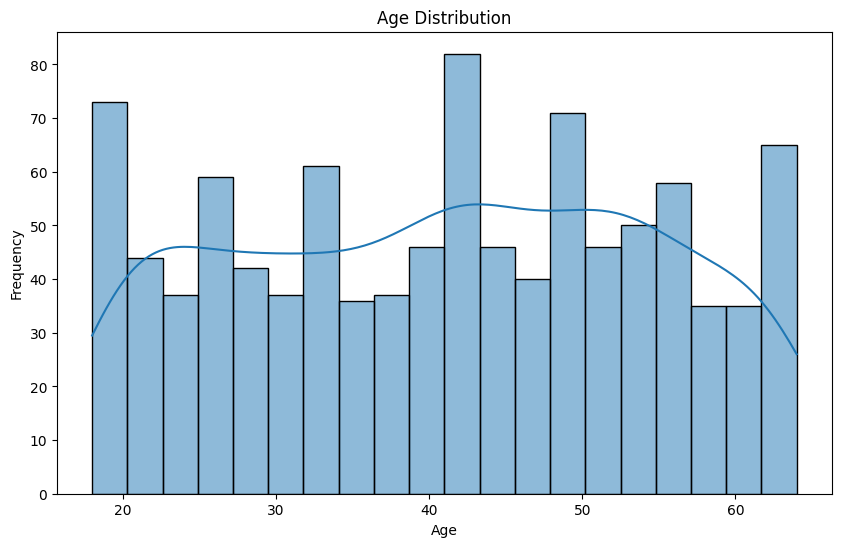

In [4]:
#Yaş Dağılımı Analizi: Kullanıcıların yaşlarının dağılımını incelemek, hedef kitle hakkında daha fazla bilgi verir.
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

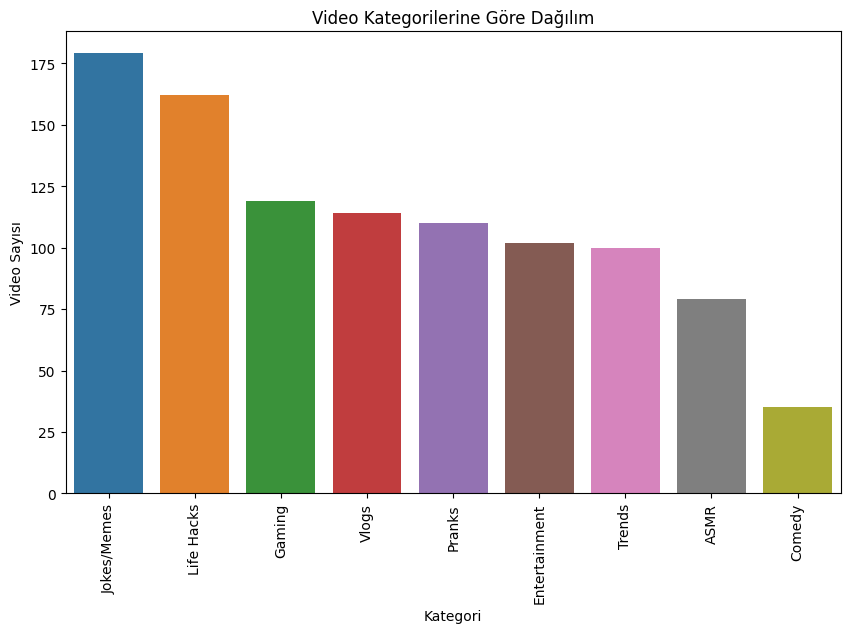

In [5]:
# Video Kategorisine göre dağılım
category_distribution = data['Video Category'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=category_distribution.index, y=category_distribution.values)
plt.xticks(rotation=90)
plt.title('Video Kategorilerine Göre Dağılım')
plt.ylabel('Video Sayısı')
plt.xlabel('Kategori')
plt.show()


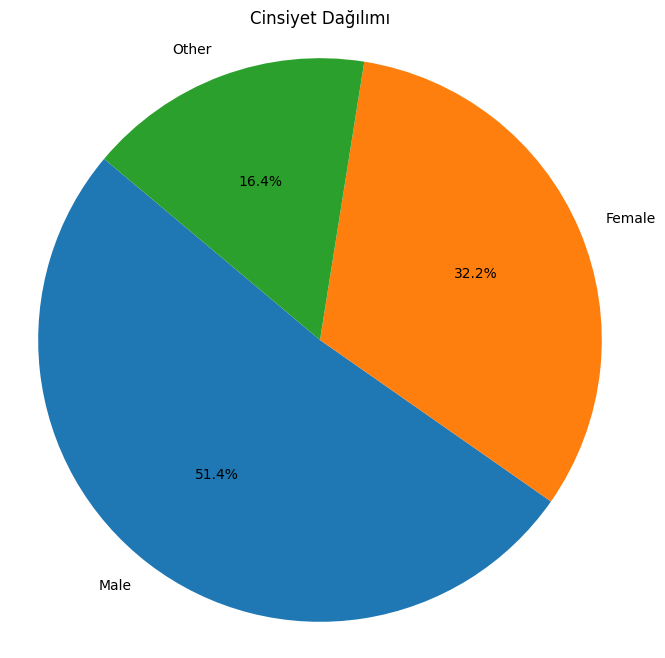

In [6]:
#cinsiyet dağılımı pasta

gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cinsiyet Dağılımı')
plt.axis('equal')  # Eşit boyutlu dilimler
plt.show()

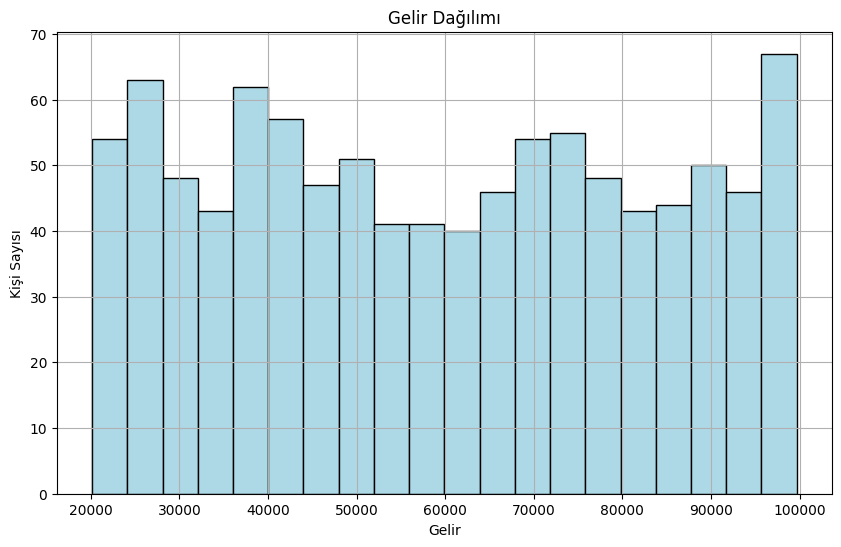

In [7]:
# Gelir dağılımı için histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Income'], bins=20, color='lightblue', edgecolor='black')
plt.title('Gelir Dağılımı')
plt.xlabel('Gelir')
plt.ylabel('Kişi Sayısı')
plt.grid(True)
plt.show()

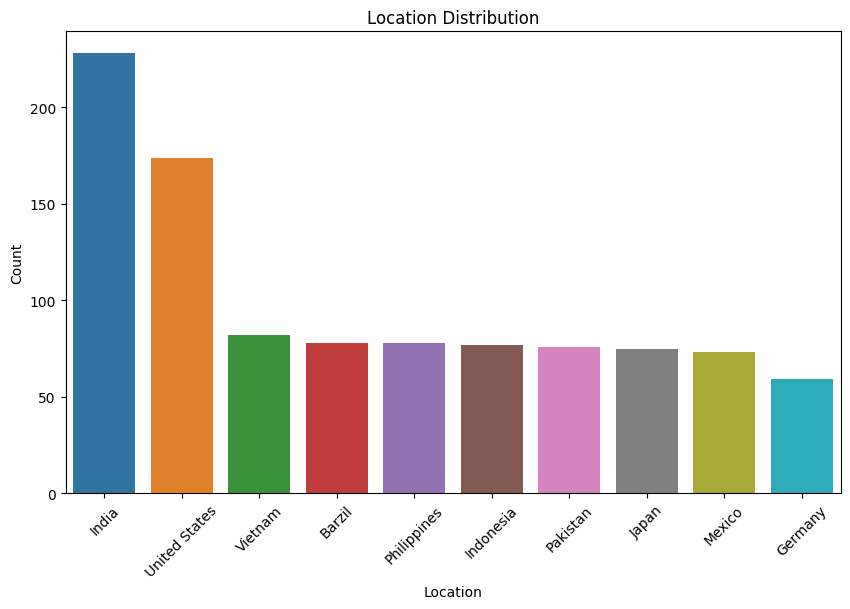

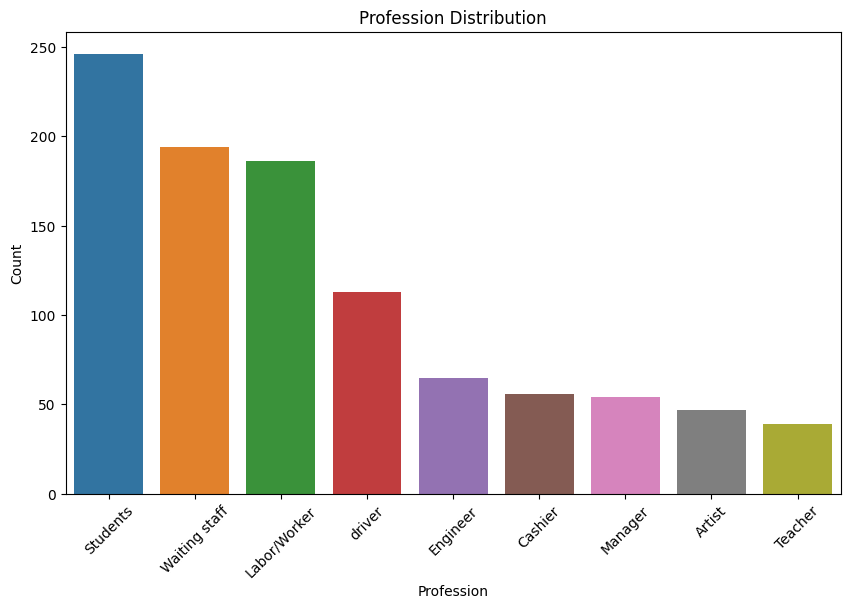

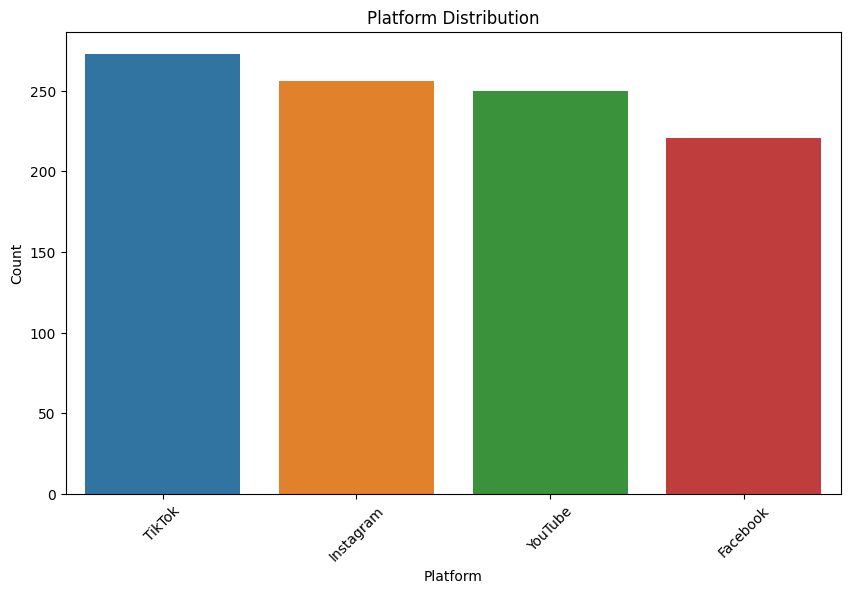

In [8]:
# Görselleştirme için bir fonksiyon oluştur
def plot_categorical_distribution(column, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, order=data[column].value_counts().index)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
    
# İlgili kategorik değişkenlerin dağılımını çiz

plot_categorical_distribution('Location', 'Location Distribution')
plot_categorical_distribution('Profession', 'Profession Distribution')
plot_categorical_distribution('Platform', 'Platform Distribution')



## Bulgular
### Cinsiyet Dağılımı
Cinsiyet dağılımına göre kullanıcıların %50'si erkek, %31'i kadın ve yaklaşık %20'si "diğer" olarak sınıflandırılmıştır.

### Lokasyon Dağılımı
Kullanıcıların lokasyonlarına göre sıralama:
1. Hindistan
2. ABD
3. Vietnam
4. Brezilya
5. Filipinler
6. Endonezya
7. Pakistan
8. Japonya
9. Meksika
10. Almanya

### Meslek Dağılımı
Meslek dağılımında en yüksek oran %25 ile "öğrenciler" olarak gözlemlenmiştir. Diğer meslek grupları ise azalan sıralamayla aşağıdaki gibidir:
- Bekleme personeli
- İşçi
- Şoför
- Mühendis
- Kasiyer
- Yönetici
- Sanatçı
- Öğretmen

### Platform Dağılımı
Kullanıcıların platform tercihleri:
1. TikTok
2. Instagram
3. YouTube
4. Facebook

### Video Kategorisi Dağılımı
Video kategorisine göre dağılım:
1. Şakalar/Memler
2. Hayat Tüyoları
3. Oyun
4. Vloglar
5. Şakalar
6. Eğlence
7. Trendler
8. ASMR
9. Komedi


**Adım 5: Ekstra Analizler ve İlişkilerin İncelenmesi**

Yaş ve bağımlılık seviyeleri arasındaki ilişkiyi inceleyelim. Ayrıca, cinsiyete göre ortalama yaşı gösterelim ve yukardaki grafiklerin birbiriyle olan ilişkilerine bakalım.

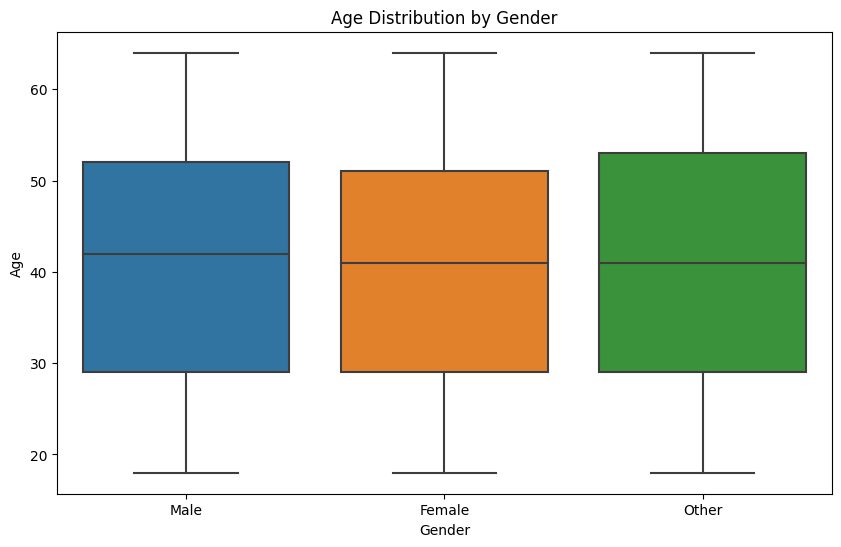

In [9]:
#Cinsiyet ve Yaş İlişkisi: Cinsiyete göre yaş dağılımını inceleyerek, hangi yaş grubundaki kullanıcıların daha fazla olduğunu görebiliriz.
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Gender', y='Age')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

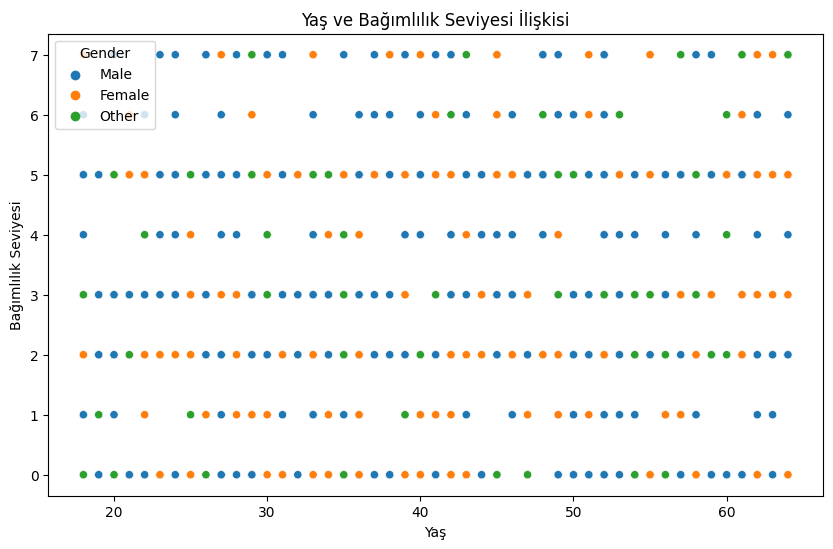

In [10]:
# Yaş ve bağımlılık seviyesi ilişkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Addiction Level', hue='Gender')
plt.title('Yaş ve Bağımlılık Seviyesi İlişkisi')
plt.xlabel('Yaş')
plt.ylabel('Bağımlılık Seviyesi')
plt.show()

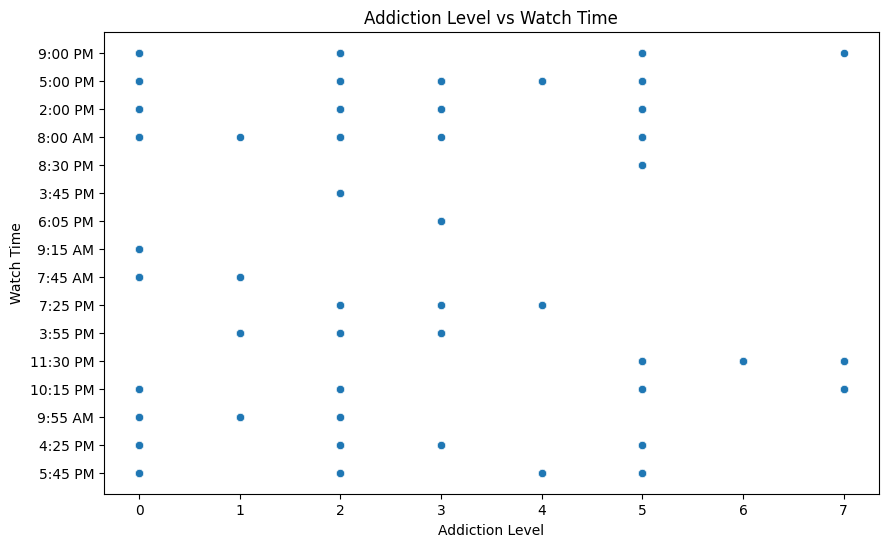

In [11]:
#Bağımlılık Seviyesi ve İzleme Süresi İlişkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Addiction Level', y='Watch Time')
plt.title('Addiction Level vs Watch Time')
plt.xlabel('Addiction Level')
plt.ylabel('Watch Time')
plt.show()

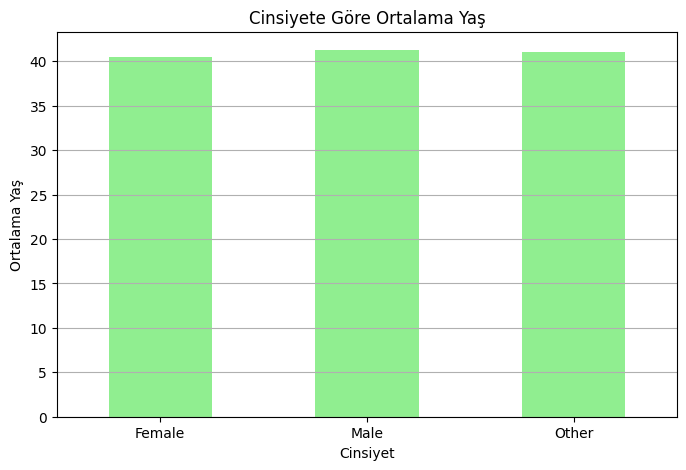

In [12]:
# Cinsiyete Göre Ortalama Yaş çubuk grafik

average_age_by_gender = data.groupby('Gender')['Age'].mean()

plt.figure(figsize=(8, 5))
average_age_by_gender.plot(kind='bar', color='lightgreen')
plt.title('Cinsiyete Göre Ortalama Yaş')
plt.xlabel('Cinsiyet')
plt.ylabel('Ortalama Yaş')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

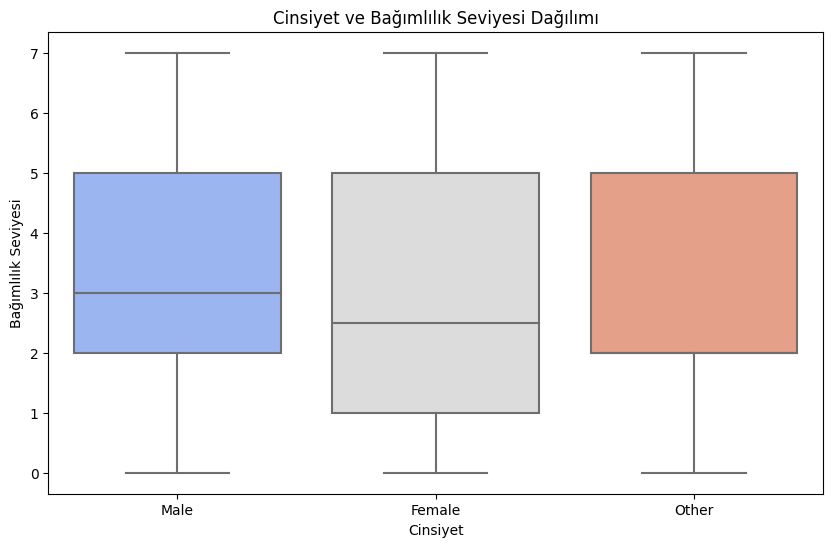

In [13]:
# Cinsiyet ve bağımlılık seviyesi kutu grafiği
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Addiction Level', data=data, palette='coolwarm')
plt.title('Cinsiyet ve Bağımlılık Seviyesi Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Bağımlılık Seviyesi')
plt.show()

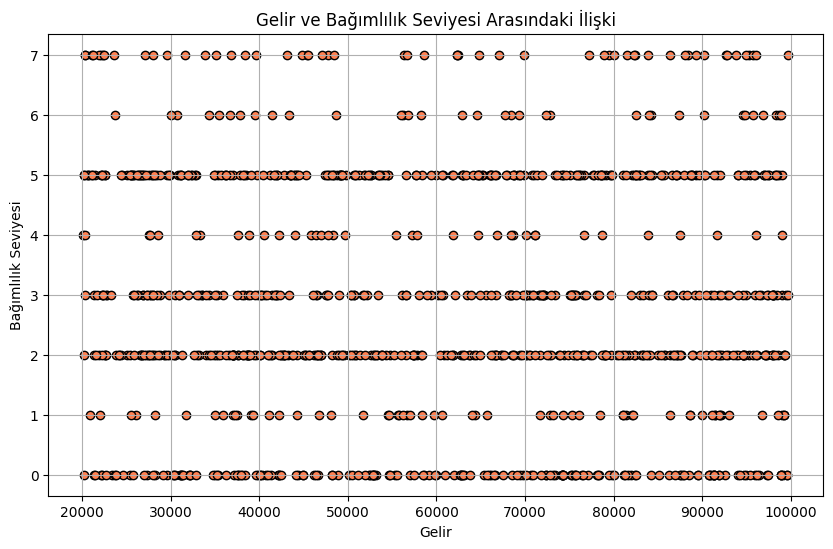

In [14]:
# Gelir ve bağımlılık seviyesi arasındaki ilişki
plt.figure(figsize=(10, 6))
plt.scatter(data['Income'], data['Addiction Level'], color='coral', edgecolor='black')
plt.title('Gelir ve Bağımlılık Seviyesi Arasındaki İlişki')
plt.xlabel('Gelir')
plt.ylabel('Bağımlılık Seviyesi')
plt.grid(True)
plt.show()

**Adım 6: Sonuçların Yorumlanması**

Verilerimiz ve görselleştirmelerimiz tamamlandığında, elde ettiğimiz bulguları yorumlayalım.

1. Bağımlılık Seviyesi ve İzleme
Grafikte, bağımlılık seviyesi ile izleme süresi arasında bir ilişki gözlemlenmiştir. Genel olarak, bağımlılık seviyesi arttıkça izleme süresinin de arttığı görülmektedir. Bu durum, daha bağımlı kullanıcıların daha fazla zaman harcadığını ve içerik tüketiminde daha fazla aktivite gösterdiğini düşündürmektedir. Kullanıcıların bağımlılık seviyelerinin izleme süreleri üzerindeki etkisini incelemek, içerik tüketim alışkanlıklarını anlamak açısından önemlidir.

2. Video Kategorileri ile İzleme Süresi Arasındaki İlişki
Video kategorileri ile izleme süresi arasındaki grafik, bazı kategorilerin daha fazla izlenme süresine sahip olduğunu göstermektedir. Örneğin, 'gaming' ve 'life hacks' kategorileri kullanıcılar tarafından daha fazla tercih edilirken, bu kategorilere ayrılan zaman da diğer kategorilere göre daha yüksektir. Bu durum, kullanıcıların belirli içerik türlerine olan ilgisini ve bu içeriklerin izleme sürelerini etkileyen faktörleri incelemek için önemli bir gösterge olabilir.

3. Cinsiyet ve Yaş İlişkisi
Cinsiyet ile yaş arasındaki ilişkiyi gösteren grafik, erkek ve kadın kullanıcıların yaş dağılımlarında önemli farklılıklar olduğunu ortaya koymaktadır. Erkek kullanıcıların yaş ortalaması, kadınlara göre daha yüksek görünmektedir. Bu bulgu, belirli yaş gruplarının ve cinsiyetlerin içerik tüketiminde farklı davranışlar sergileyebileceğini işaret etmektedir.

4. Yaş Dağılımı Analizi
Yaş dağılımı analizi, kullanıcıların yaş aralıklarının çoğunlukla genç yetişkinler (18-34 yaş) arasında yoğunlaştığını göstermektedir. Bu durum, dark web'in ve benzeri platformların genç kullanıcılar tarafından daha fazla benimsendiğini düşündürmektedir. Gençlerin teknolojiye olan yatkınlıkları ve interneti aktif kullanma eğilimleri, bu durumu açıklayabilir.

5. Video Kategorisine Göre Dağılım
Video kategorilerine göre dağılım, kullanıcıların en çok hangi tür içeriklerle ilgilendiğini ortaya koymaktadır. Jokes/memes, gaming ve life hacks gibi kategoriler en popüler olanlar arasında yer almaktadır. Bu, içerik üreticilerinin hedef kitlelerini belirlemeleri ve içerik stratejilerini geliştirmeleri için değerli bir bilgi sunar.

6. Cinsiyet Dağılımı
Cinsiyet dağılımı grafiklerinde erkek kullanıcıların sayısının, kadın kullanıcılara göre belirgin şekilde fazla olduğu görülmektedir. 'Other' kategorisinde yer alan kullanıcılar ise daha az temsil edilmektedir. Bu bulgu, dark web kullanıcılarının cinsiyet dengesinin belirli bir ölçüde dengesiz olduğunu göstermektedir.

7. Yaş ve Bağımlılık Seviyesi İlişkisi Dağılım
Yaş ve bağımlılık seviyesi ilişkisi, yaş ilerledikçe bağımlılık seviyesinin de arttığını göstermektedir. Genç yaş grubundaki kullanıcıların daha düşük bağımlılık seviyelerine sahip olduğu, yaş ilerledikçe bağımlılık seviyesinin artma eğilimi gösterdiği dikkate değerdir.

8. Cinsiyete Göre Ortalama Yaş Grafiği
Cinsiyete göre ortalama yaş grafiği, erkek ve kadın kullanıcıların yaş ortalamalarını karşılaştırarak cinsiyetin yaş üzerindeki etkisini göstermektedir. Erkeklerin ortalama yaşının daha yüksek olması, dark web kullanıcılarının cinsiyet ve yaş ilişkisini analiz etmek için ilginç bir nokta sunmaktadır.

9. Gelir Dağılımı
Gelir dağılımı analizi, kullanıcıların gelir düzeylerinin genel olarak değişkenlik gösterdiğini ortaya koymaktadır. Gelir düzeyinin farklı olması, içerik tüketim alışkanlıklarını ve kullanıcıların platformda geçirdiği zamanı etkileyebilir.

10. Gelir ve Bağımlılık Seviyesi Arasındaki İlişki
Gelir ile bağımlılık seviyesi arasındaki ilişkiyi gösteren grafik, daha yüksek gelire sahip kullanıcıların bağımlılık seviyelerinin de daha yüksek olduğunu ortaya koymaktadır. Bu durum, gelir düzeyinin kullanıcıların içerik tüketiminde etkili bir faktör olabileceğini göstermektedir.

11. Cinsiyet ve Bağımlılık Seviyesi Kutu Grafiği
Cinsiyet ve bağımlılık seviyesi arasındaki ilişkiyi gösteren kutu grafiği, erkek kullanıcıların bağımlılık seviyelerinin kadınlara göre daha fazla değişkenlik gösterdiğini ve daha yüksek bağımlılık seviyelerine sahip olduğunu göstermektedir. Bu durum, cinsiyetin bağımlılık seviyesini etkileyen önemli bir faktör olabileceğini düşündürmektedir.



# Genel Değerlendirme



Elde edilen bulgular, kullanıcıların yaş, cinsiyet, gelir ve bağımlılık seviyesi gibi demografik özelliklerinin dark web üzerindeki içerik tüketim alışkanlıklarını etkileyen önemli faktörler olduğunu göstermektedir. Analiz sonuçları, farklı demografik grupların içerik tercihlerinin ve izleme davranışlarının nasıl değişiklik gösterdiğine dair önemli içgörüler sunmaktadır.

Özellikle yaş, kullanıcıların hangi tür içeriklere yöneldiği üzerinde belirleyici bir etkiye sahiptir. Genç kullanıcıların, eğlence ve interaktif içeriklere daha fazla ilgi göstermesi, onların sosyal medya ve dijital platformlarla olan güçlü bağlarını yansıtmaktadır. Bununla birlikte, yaşlı kullanıcılar genellikle daha geleneksel ve bilgilendirici içeriklere yönelmekte, bu da yaş grubuna özgü içerik stratejilerinin geliştirilmesini zorunlu kılmaktadır.

Cinsiyet faktörü de kullanıcı davranışlarını önemli ölçüde şekillendirmektedir. Analizimiz, erkek ve kadın kullanıcıların farklı içerik kategorilerine yönelik farklı ilgi ve alışkanlıkları olduğunu ortaya koymaktadır. Örneğin, erkek kullanıcıların oyun ve komedi gibi içerik türlerine yönelme eğilimi gösterirken, kadın kullanıcıların yaşam tarzı, güzellik ve eğlence gibi kategorilere daha fazla ilgi gösterdiği görülmektedir. Bu durum, içerik üreticilerinin ve pazarlama ekiplerinin cinsiyete dayalı hedefleme stratejilerini nasıl geliştirmeleri gerektiği konusunda önemli ipuçları sunmaktadır.

Gelir düzeyi, dark web üzerindeki içerik tüketim alışkanlıkları üzerinde başka bir önemli etkendir. Yüksek gelir seviyesine sahip kullanıcılar, genellikle premium içeriklere ve daha kaliteli yapımlara erişim sağlayabilmekte, bu da onların tüketim alışkanlıklarını etkilemektedir. Ekonomik durumları iyi olan kullanıcıların daha fazla harcama yapma eğilimleri, içerik üretiminde dikkat edilmesi gereken bir diğer noktadır.

Bağımlılık seviyesi ise kullanıcıların içerik tüketim sürelerini ve sıklıklarını doğrudan etkileyen bir faktördür. Yüksek bağımlılık seviyesine sahip bireyler, içerik izleme konusunda daha fazla zaman harcarken, bu durum sosyal yaşamları ve diğer faaliyetleri üzerinde olumsuz etkilere yol açabilmektedir. Bu bağlamda, içerik üreticileri ve platform yöneticileri, kullanıcıların bağımlılık seviyelerini göz önünde bulundurarak içerik sunumunu ve stratejilerini yeniden değerlendirmelidir.

Sonuç olarak, dark web gibi dinamik ve değişken bir platformda kullanıcı davranışlarını anlamak, içerik üreticileri ve pazarlama stratejileri için kritik öneme sahiptir. Kullanıcıların demografik özellikleri, içerik tüketim alışkanlıklarını şekillendiren temel etkenlerdir. Elde edilen bulgular ışığında, içerik stratejilerinin geliştirilmesi ve kullanıcıların ihtiyaçlarına uygun içeriklerin oluşturulması açısından daha derinlemesine analizler yapılması önerilmektedir.